In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import calendar

# TITLE

# DATA DESCRIPTION

Patients seen in the Emergency Department according to Age and Sex - HNAL


In [3]:
#FECHA_INGRESO:ADMISSION DATE,FECHA EGRESO:DISCHARGE DATE,ESTABLECIMIENTo:ESTABLISHMENT,PROVINCIA:PROVINCE,DISTRITO:DISTRICT,SERVICIO INGRESO:INCOME SERVICE

In [4]:
patients_emergency_department=pd.read_csv('/content/drive/MyDrive/Omdena/Health/PACIENTES_ATENDIDOS_POR_EDAD_Y_SEXO.csv')
patients_emergency_department.head()

,FECHA_CORTE,FECHA_INGRESO,FECHA_EGRESO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,SEXO,EDAD,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,SERVICIO_INGRESO
0,20230621,15/02/2023,7/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,FEMENINO,34,LIMA,LIMA,SAN JUAN DE LURIGANCHO,TOPICO DE MEDICINA
1,20230621,21/02/2023,1/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,89,LIMA,LIMA,LIMA,TOPICO DE MEDICINA
2,20230621,23/02/2023,3/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,37,LIMA,LIMA,LURIGANCHO,TOPICO DE MEDICINA
3,20230621,24/02/2023,1/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,LIMA,INDEPENDENCIA,TOPICO DE CIRUGIA
4,20230621,24/02/2023,2/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,CAJATAMBO,COPA,TOPICO DE MEDICINA


# DATA CLEANING

In [5]:
patients_emergency_department.shape

(8407, 14)

In [6]:
patients_emergency_department.describe()

,FECHA_CORTE,UBIGEO,EDAD
count,8407.0,8407.0,8407.000000
mean,20230621.0,150101.0,40.659688
std,0.0,0.0,22.980185
min,20230621.0,150101.0,1.000000
25%,20230621.0,150101.0,23.000000
50%,20230621.0,150101.0,39.000000
75%,20230621.0,150101.0,58.500000
max,20230621.0,150101.0,103.000000


In [7]:
patients_emergency_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FECHA_CORTE            8407 non-null   int64 
 1   FECHA_INGRESO          8407 non-null   object
 2   FECHA_EGRESO           8407 non-null   object
 3   ESTABLECIMIENTO        8407 non-null   object
 4   DEPARTAMENTO           8407 non-null   object
 5   PROVINCIA              8407 non-null   object
 6   DISTRITO               8407 non-null   object
 7   UBIGEO                 8407 non-null   int64 
 8   SEXO                   8407 non-null   object
 9   EDAD                   8407 non-null   int64 
 10  DEPARTAMENTO_PACIENTE  8407 non-null   object
 11  PROVINCIA_PACIENTE     8407 non-null   object
 12  DISTRITO_PACIENTE      8407 non-null   object
 13  SERVICIO_INGRESO       8407 non-null   object
dtypes: int64(3), object(11)
memory usage: 919.6+ KB


In [8]:
print('Null values:',patients_emergency_department.isnull().sum().sum())

Null values: 0


In [9]:
patients_emergency_department.duplicated().sum()

0

# DATA VISUALISATION

Gender Distribution:



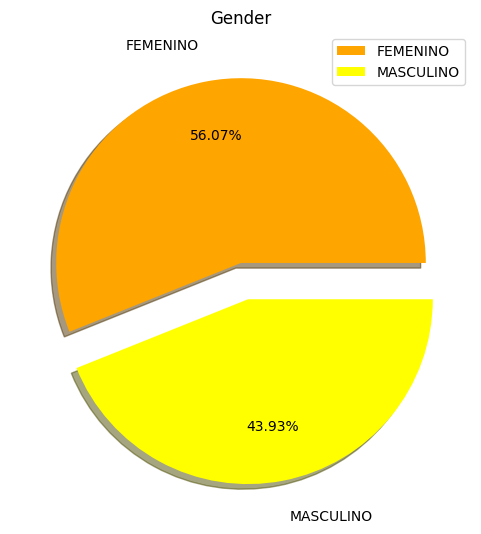

In [10]:
Gender_count = patients_emergency_department.SEXO.value_counts()
Gender_count
plt.figure(figsize=(6,6))
plt.pie(x=Gender_count, labels=Gender_count.index,
        colors=[ 'orange', 'yellow'],
        explode = [ 0, 0.2],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.title("Gender")
plt.legend();

'''The pie chart illustrates the gender distribution among patients in the Emergency Department.
Females account for approximately 56.07% of the patients, while males make up the remaining 43.93%.'''

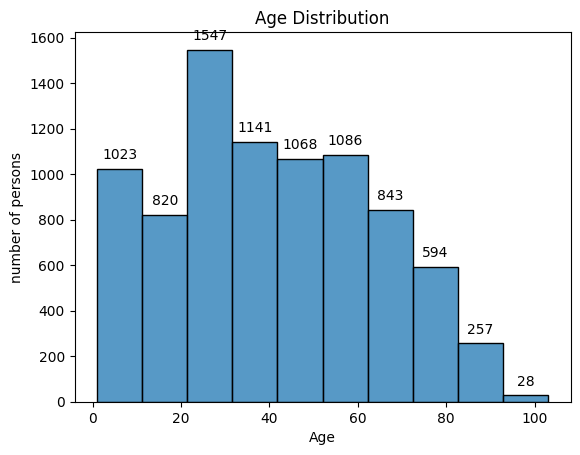

In [11]:
sns.histplot(x=patients_emergency_department['EDAD'].sort_values(ascending=True), bins=10);


plt.xlabel("Age")
plt.ylabel("number of persons")
plt.title("Age Distribution")
#plt.xticks(rotation = 90)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Age distribution

'''The largest number of patients are from the age between 21 to 40 followed by the age group 0 to 10 and 41 to 60years. so therefore more number of patients seen in the emergengy department are from age 21 to 40 years'''

In [12]:
# Convert string dates to datetime objects with a specific format
patients_emergency_department['FECHA_INGRESO'] = pd.to_datetime(patients_emergency_department['FECHA_INGRESO'], format='%d/%m/%Y')
patients_emergency_department['FECHA_EGRESO'] = pd.to_datetime(patients_emergency_department['FECHA_EGRESO'], format='%d/%m/%Y')

# Calculate the number of days between start and end dates
# df['days_between'] = (df['end_date'] - df['start_date']).dt.days
patients_emergency_department['days_between'] = (patients_emergency_department['FECHA_EGRESO'] - patients_emergency_department['FECHA_INGRESO']).dt.days

In [13]:
patients_emergency_department['day_of_week'] = patients_emergency_department['FECHA_INGRESO'].dt.day_name()

In [14]:
patients_emergency_department['day_of_week'].value_counts()

Thursday     1358
Friday       1322
Monday       1257
Tuesday      1251
Wednesday    1233
Saturday     1063
Sunday        923
Name: day_of_week, dtype: int64

In [15]:
patients_emergency_department['Week_arrival'] = patients_emergency_department['FECHA_INGRESO'].dt.isocalendar().week
patients_emergency_department['Week_discharge'] = patients_emergency_department['FECHA_EGRESO'].dt.isocalendar().week
week_number_format = 'Week {}'
patients_emergency_department['Week_arrival'] = patients_emergency_department['Week_arrival'].apply(lambda x: week_number_format.format(x))
patients_emergency_department['Week_discharge'] = patients_emergency_department['Week_discharge'].apply(lambda x: week_number_format.format(x))

In [16]:
patients_emergency_department.head()

,FECHA_CORTE,FECHA_INGRESO,FECHA_EGRESO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,SEXO,EDAD,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,SERVICIO_INGRESO,days_between,day_of_week,Week_arrival,Week_discharge
0,20230621,2023-02-15,2023-03-07,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,FEMENINO,34,LIMA,LIMA,SAN JUAN DE LURIGANCHO,TOPICO DE MEDICINA,20,Wednesday,Week 7,Week 10
1,20230621,2023-02-21,2023-03-01,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,89,LIMA,LIMA,LIMA,TOPICO DE MEDICINA,8,Tuesday,Week 8,Week 9
2,20230621,2023-02-23,2023-03-03,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,37,LIMA,LIMA,LURIGANCHO,TOPICO DE MEDICINA,8,Thursday,Week 8,Week 9
3,20230621,2023-02-24,2023-03-01,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,LIMA,INDEPENDENCIA,TOPICO DE CIRUGIA,5,Friday,Week 8,Week 9
4,20230621,2023-02-24,2023-03-02,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,CAJATAMBO,COPA,TOPICO DE MEDICINA,6,Friday,Week 8,Week 9


Subgroup Analysis Based on Duration of Stay

In [17]:
LessThan10Days=patients_emergency_department[patients_emergency_department['days_between']<=10]
greater_than_10_less_than_20_days = patients_emergency_department[
    (patients_emergency_department['days_between'] > 10) & (patients_emergency_department['days_between'] <= 20)]
MoreThan20Days=patients_emergency_department[patients_emergency_department['days_between']>20]


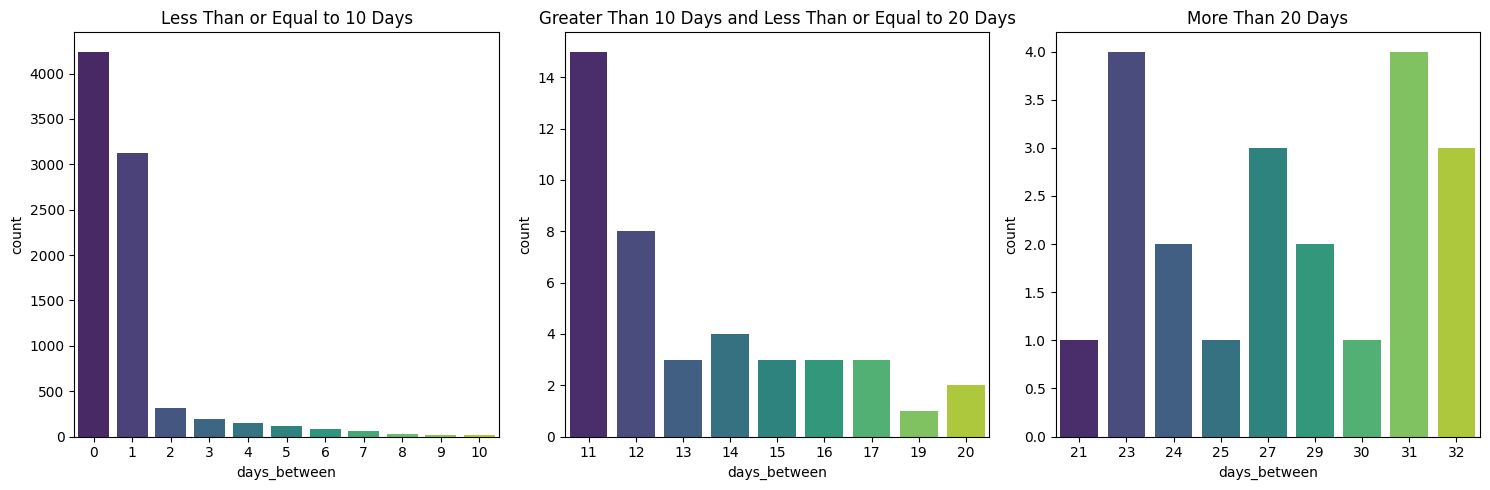

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Less than or equal to 10 days
sns.countplot(x='days_between', data=LessThan10Days, ax=axes[0], palette='viridis')
axes[0].set_title('Less Than or Equal to 10 Days')

# Subplot 2: Greater than 10 days and less than or equal to 20 days
sns.countplot(x='days_between', data=greater_than_10_less_than_20_days, ax=axes[1], palette='viridis')
axes[1].set_title('Greater Than 10 Days and Less Than or Equal to 20 Days')

# Subplot 3: More than 20 days
sns.countplot(x='days_between', data=MoreThan20Days, ax=axes[2], palette='viridis')
axes[2].set_title('More Than 20 Days')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

'''
Subgroup Analysis Based on Duration of Stay:
1. Less Than or Equal to 10 Days:
In this subgroup, the majority of patients were both admitted and discharged on the same date. More than 4,000 patients were admitted and discharged on the same date, and an additional 3,000 stayed for one day, being discharged the following day after admission.

2. Greater Than 10 Days and Less Than or Equal to 20 Days:
For patients with stays between 10 and 20 days, approximately 15 patients stayed for 11 days, and 8 individuals stayed for 12 days. Additionally, there was a range from a minimum of 1 to a maximum of 4 patients who stayed for durations between 13 and 20 days.

3. More Than 20 Days:
Patients with stays exceeding 20 days were less frequent compared to the other two categories. The maximum number of patients was 4, and they stayed for 23 and 31 days. The remaining patients ranged from 1 to 3 for durations between 21 and 32 days.

'''

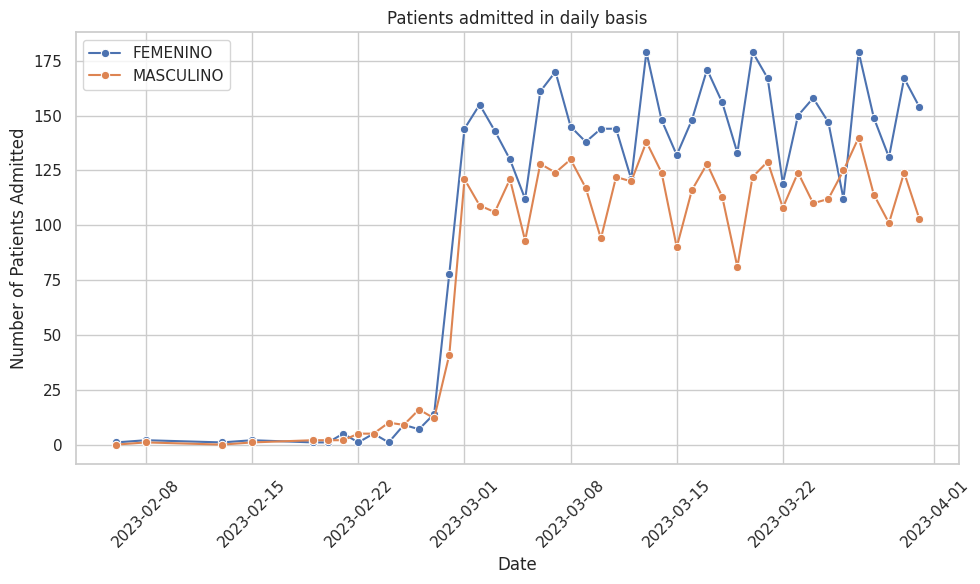

In [19]:

# Count the number of patients admitted each day for each gender
patients_admitted = patients_emergency_department.groupby(['FECHA_INGRESO', 'SEXO']).size().unstack(fill_value=0)
df_plot = patients_admitted.reset_index()
df_plot.columns = ['Date', 'FEMENINO', 'MASCULINO']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='FEMENINO', marker='o', data=df_plot, label='FEMENINO')
sns.lineplot(x='Date', y='MASCULINO', marker='o', data=df_plot, label='MASCULINO')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Patients Admitted')
plt.title('Patients admitted in daily basis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the x-axis date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Patients Seen on a Weekly Basis

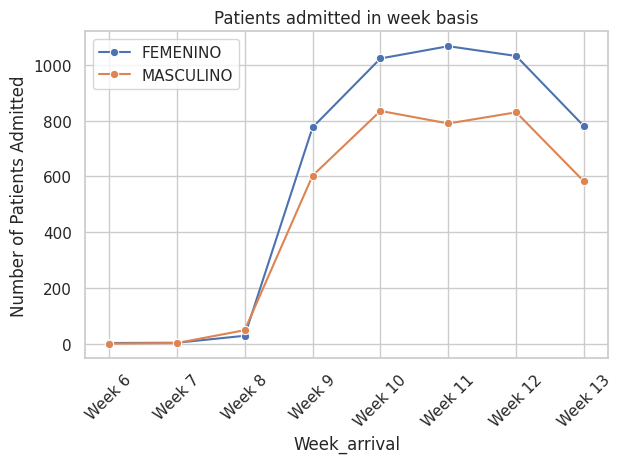

In [27]:
# Count the number of patients admitted each week for each gender
patients_admitted_week = patients_emergency_department.groupby(['Week_arrival', 'SEXO']).size().unstack(fill_value=0)
df_plot1 = patients_admitted_week.reset_index()
df_plot1.columns = ['Week_arrival', 'FEMENINO', 'MASCULINO']
df_plot1['WeekNumeric'] = df_plot1['Week_arrival'].str.extract('(\d+)').astype(int)
df_sorted = df_plot1.sort_values(by='WeekNumeric')
sns.lineplot(x='Week_arrival', y='FEMENINO', marker='o', data=df_sorted, label='FEMENINO')
sns.lineplot(x='Week_arrival', y='MASCULINO', marker='o', data=df_sorted, label='MASCULINO')


# Set plot labels and title
plt.xlabel('Week_arrival')
plt.ylabel('Number of Patients Admitted')
plt.title('Patients admitted in week basis')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the x-axis date ticks
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



'''The data indicates fluctuations in patient numbers, with a significant increase in Weeks 9 and 10. While both genders experience variations, females consistently exhibit higher numbers compared to males, especially in Weeks 10, 11, and 12.

These findings provide valuable insights into the weekly trends in patient visits, allowing for further exploration of potential factors influencing healthcare-seeking behavior during different periods.'''

Patients Seen on a Weekly Basis

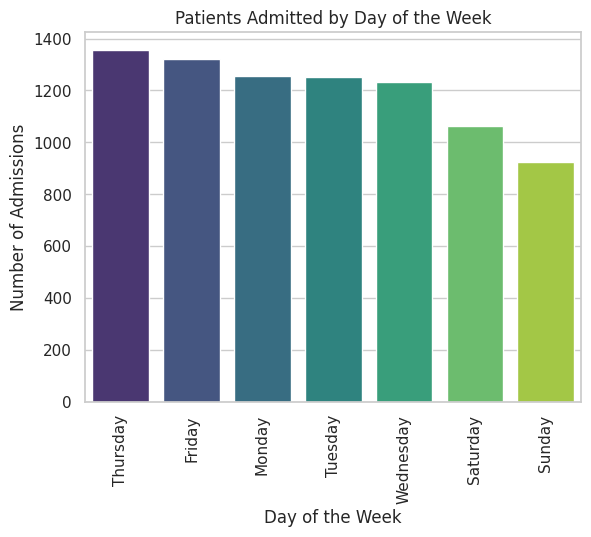

In [28]:
# Count the number of admissions for each day of the week
admissions_by_day = patients_emergency_department['day_of_week'].value_counts().reset_index()
admissions_by_day.columns = ['DayOfWeek', 'Admissions']

#Create a barchart
sns.barplot(x='DayOfWeek', y='Admissions', data=admissions_by_day, order=admissions_by_day['DayOfWeek'], palette='viridis')
# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Admissions')
plt.title('Patients Admitted by Day of the Week')
plt.xticks(rotation = 90)
# Show the plot
plt.show()


'''The daily admission trends underscore the importance of understanding and preparing for variations in healthcare demand throughout the week. Thursdays and Fridays experience the highest admissions, possibly indicating a higher occurrence of medical events during the latter part of the workweek. Robust admission rates on Mondays and Tuesdays suggest an increased need for healthcare services at the beginning of the week. This information can guide healthcare professionals and administrators in optimizing staffing, resource allocation, and scheduling to meet the varying demands on different days of the week.'''

In [29]:
patients_emergency_department.PROVINCIA_PACIENTE.value_counts().head(15)

LIMA          7820
CALLAO         217
CAÑETE          22
MAYNAS          18
HUAROCHIRI      17
HUANUCO         14
CHICLAYO        13
HUARAL          12
SANTA           12
HUARAZ          12
HUAURA          12
BARRANCA        11
YAROWILCA       10
CHINCHA          8
PIURA            8
Name: PROVINCIA_PACIENTE, dtype: int64

Highest Patients count based on province

LIMA          7820
CALLAO         217
CAÑETE          22
MAYNAS          18
HUAROCHIRI      17
Name: PROVINCIA_PACIENTE, dtype: int64


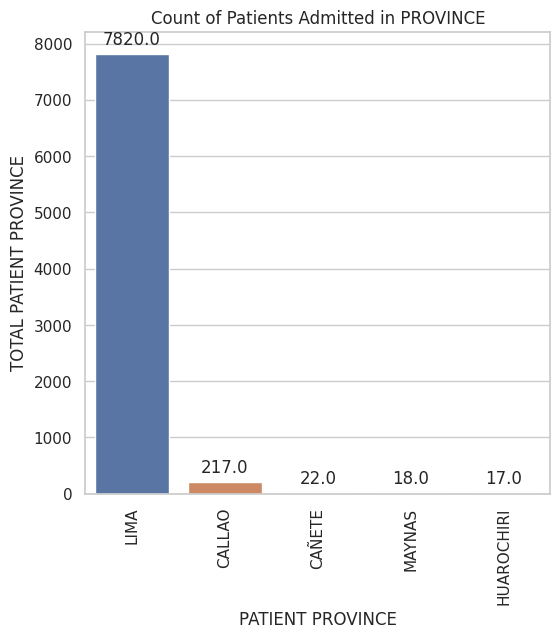

In [30]:
PROVINCIA_PACIENTE_count= patients_emergency_department.PROVINCIA_PACIENTE.value_counts().head()
print(PROVINCIA_PACIENTE_count)


plt.figure(figsize=(6,6))
sns.barplot(y=PROVINCIA_PACIENTE_count,x=PROVINCIA_PACIENTE_count.index)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('PATIENT PROVINCE')
plt.ylabel('TOTAL PATIENT PROVINCE')
plt.title('Count of Patients Admitted in PROVINCE')
plt.xticks(rotation = 90)

plt.show()

The highest count of patients by province is lima with 7820, Callao following closely at 217. All other provinces have counts below 25.

Highest Patients count based on District

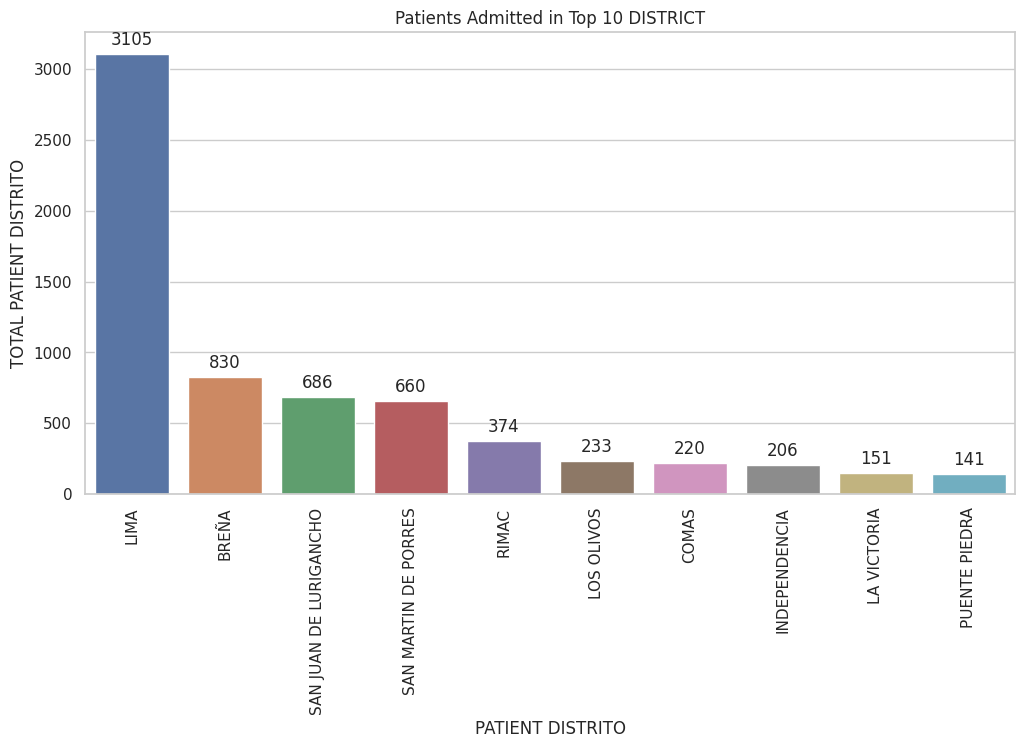

In [31]:
DISTRITO_PACIENTE_count= patients_emergency_department.DISTRITO_PACIENTE.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=DISTRITO_PACIENTE_count,x=DISTRITO_PACIENTE_count.index);
# Set labels and title
plt.xlabel('PATIENT DISTRITO')
plt.ylabel('TOTAL PATIENT DISTRITO')
plt.title('Patients Admitted in Top 10 DISTRICT')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 90)

plt.show()

'''The distribution of patient counts across districts highlights varying healthcare demands in different regions. Understanding the concentration of patients in specific districts, particularly Lima, Brena, San Juan, and San Martin, is crucial for effective resource allocation, healthcare planning, and targeted interventions in areas with higher needs. This information can guide healthcare professionals and policymakers in addressing the specific healthcare requirements of each district within the broader context of patient distribution.'''

Percentage of Income Services

In [32]:
SERVICIO_INGRESO_Count=patients_emergency_department['SERVICIO_INGRESO'].value_counts().sort_values(ascending=False)
SERVICIO_INGRESO_Count

TOPICO DE MEDICINA                   3420
TOPICO DE CIRUGIA                    2575
TOPICO DE PEDIATRIA                  1272
TOPICO DE TRAUMATOLOGIA               386
TOPICO DE OBSTETRICIA                 346
TOPICO DE GINECOLOGIA                 327
UNIDAD DE SHOCKTRAUMA                  75
TOPICO MEDICINA = ATENCION RAPIDA       4
TOPICO TRAUMASHOCK (CARPA 3)            2
Name: SERVICIO_INGRESO, dtype: int64

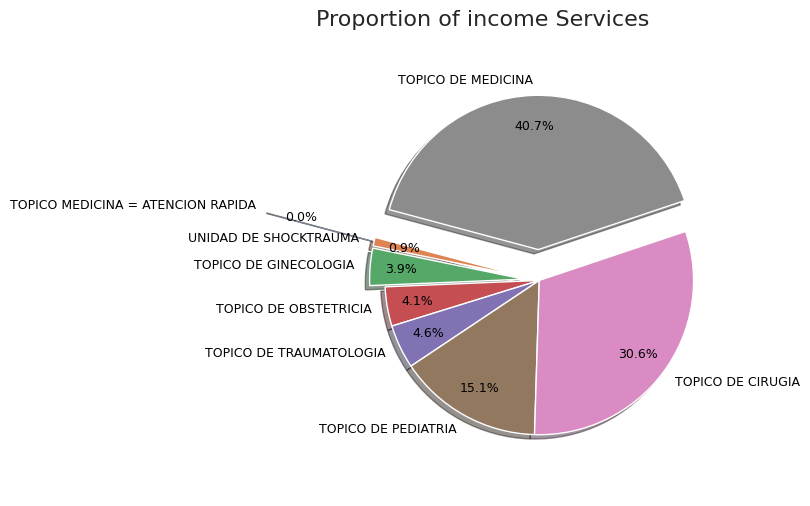

In [33]:
INCOME_SERVICE = patients_emergency_department.SERVICIO_INGRESO.value_counts()
SERVICIO_INGRESO_count = patients_emergency_department.groupby('SERVICIO_INGRESO').agg({'SERVICIO_INGRESO': 'count'})
SERVICIO_INGRESO_count = SERVICIO_INGRESO_count.rename({'SERVICIO_INGRESO': 'count_of_income_service'}, axis=1)
SERVICIO_INGRESO_count.sort_values(by='count_of_income_service', ascending=True, inplace=True)
SERVICIO_INGRESO_count.drop(index=SERVICIO_INGRESO_count.index[0], axis=0, inplace=True)

plt.figure(figsize=(6, 6))
explode = np.zeros(len(SERVICIO_INGRESO_count)-8).tolist()
explode.extend([0.8,0.1,0.1,0,0,0,0,0.2])
plt.pie(SERVICIO_INGRESO_count['count_of_income_service'], labels=SERVICIO_INGRESO_count.index, explode=explode, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        shadow=True, startangle=165, textprops=dict(color="black", fontsize='9'));
plt.axis('equal')
plt.title('Proportion of income Services',fontsize=16);
#plt.savefig('Pie_proportion_of_income_Services.png', bbox_inches='tight')

'''The pie chart visually represents the distribution of patients across various medical topics. The dominance of "TOPICO DE MEDICINA" and "TOPICO DE CIRUGIA" suggests a high demand for general medical and surgical services. Specialized areas such as pediatrics, traumatology, obstetrics, and gynecology also contribute significantly. Understanding the distribution of patients across these topics is crucial for healthcare planning, resource allocation, and providing targeted care based on the diverse medical needs represented in the dataset.'''

# CONCLUSION


'''The comprehensive analysis of the dataset reveals diverse patterns and trends in emergency department visits. Weekly admission trends showcase peaks on Thursdays and Fridays, indicating higher healthcare demand towards the end of the workweek. Notably, Monday and Tuesday also exhibit substantial admissions, suggesting an increased need for healthcare services at the beginning of the week.

The examination of patient counts by province underscores a concentration in specific areas, with one province significantly surpassing others in patient numbers. District-wise analysis further emphasizes variations in healthcare demand, with certain districts, particularly Lima, Brena, San Juan, and San Martin, demonstrating higher patient counts.

Moreover, the dataset provides insights into the distribution of patients across different medical topics. The dominance of general medicine and surgery reflects the broad spectrum of healthcare needs, while specialized areas such as pediatrics, traumatology, obstetrics, and gynecology also contribute significantly.

Understanding these patterns is crucial for effective resource allocation, healthcare planning, and targeted interventions. This comprehensive overview of the dataset equips healthcare professionals and policymakers with valuable insights to optimize services and address the specific healthcare requirements of diverse patient groups.'''




# REFERENCE

'''
Patients seen in the Emergency Department according to Age and Sex - HNAL

https://www.datosabiertos.gob.pe/dataset/pacientes-atendidos-en-emergencia-seg%C3%BAn-la-edad-y-el-sexo-hnal'''